# 1 EE4740 Huffman Mini Project - Huffman Coding

Hongyu Zhou

6148123

In [1]:
from read_wav import *
from huffman import *
import numpy as np
import sounddevice as sd
import time
import matplotlib.pyplot as plt
from metrics import *
from huffman_pair import *

## 1. Task 1
To discuss the trade-off between the Huffman Table size and computational complextiy, we try two Huffman coding methods: 
1. Directly use Huffman Coding with the amplitude at one timeframe as one symbol
2. Use Huffman Coding with the amplitudes at two consecutive timeframes as one symbol (pair-based method)

For these two cases, all the files are chosen as the training set. 

In [2]:
# load files
file_paths_train = []
file_paths_test = []

file_paths_train.append('files\F1\SI1573.wav\database\F1\SI1573.wav') 
file_paths_train.append('files\F1\SA1.wav\database\F1\SA1.wav') 
file_paths_train.append('files\F2\SX34.wav\database\F2\SX34.wav') 
file_paths_train.append('files\F2\SX304.wav\database\F2\SX304.wav') 
file_paths_train.append('files\F3\SI2114.wav\database\F3\SI2114.wav') 
file_paths_train.append('files\F3\SX134.wav\database\F3\SX134.wav') 
file_paths_train.append('files\F4\SI2204.wav\database\F4\SI2204.wav') 
file_paths_train.append('files\F4\SX224.wav\database\F4\SX224.wav') 
 
file_paths_train.append('files\M1\SA2.wav\database\M1\SA2.wav') 
file_paths_train.append('files\M1\SI2293.wav\database\M1\SI2293.wav') 
file_paths_train.append('files\M2\SI602.wav\database\M2\SI602.wav') 
file_paths_train.append('files\M2\SX374.wav\database\M2\SX374.wav') 
file_paths_train.append('files\M3\SX199.wav\database\M3\SX199.wav') 
file_paths_train.append('files\M3\SX289.wav\database\M3\SX289.wav') 
file_paths_train.append('files\M4\SI1019.wav\database\M4\SI1019.wav') 
file_paths_train.append('files\M4\SX389.wav\database\M4\SX389.wav') 

train_signals = []
test_signals = []
train_results_files = [] 
test_results_files = []
signal_arrays = [] 
 
for file_path in file_paths_train: 
    results, signal_array, _ = analyze_wav(file_path) 
    train_results_files.append(results) 
    train_signals.append(signal_array.flatten()) 

for file_path in file_paths_test: 
    results, signal_array, _ = analyze_wav(file_path) 
    test_results_files.append(results) 
    test_signals.append(signal_array.flatten()) 
num_bit = 16
train_signal_array = np.concatenate(train_signals)
# test_signal_array = np.concatenate(test_signals)


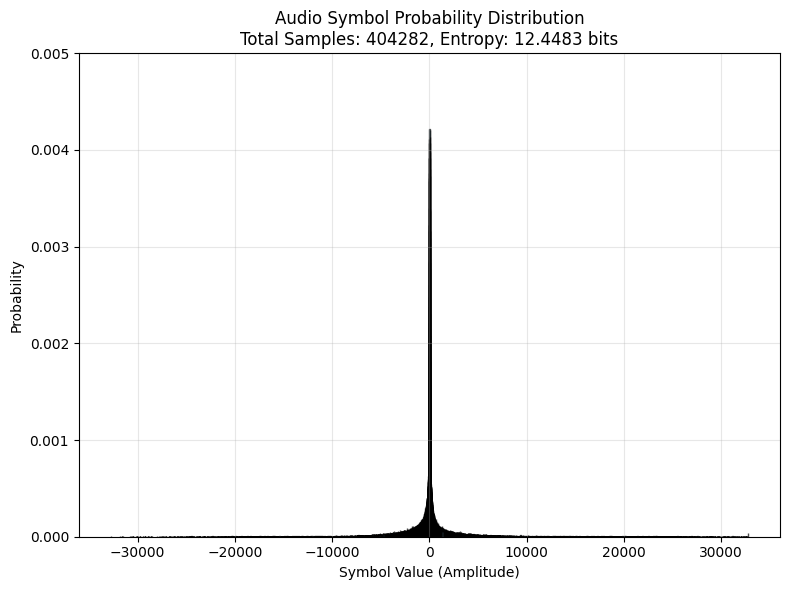

In [3]:
# plot the distribution of the symbols
calculate_symbol_distribution(train_signal_array)

Encoding time benchmark: 0.922828 seconds
Huffman encoded data length benchmark: 5043766 bits
Decoding time benchmark: 0.366392 seconds
MSE benchmark: (np.float64(0.0), np.float64(0.0))
Compression ratio benchmark: 1.2824766256007911, Compression rate benchmark: 22.02586931894074
Size of Huffman Table: 26938
Entropy: 12.4483 bits/symbol
Average code length: 12.4759 bits/symbol


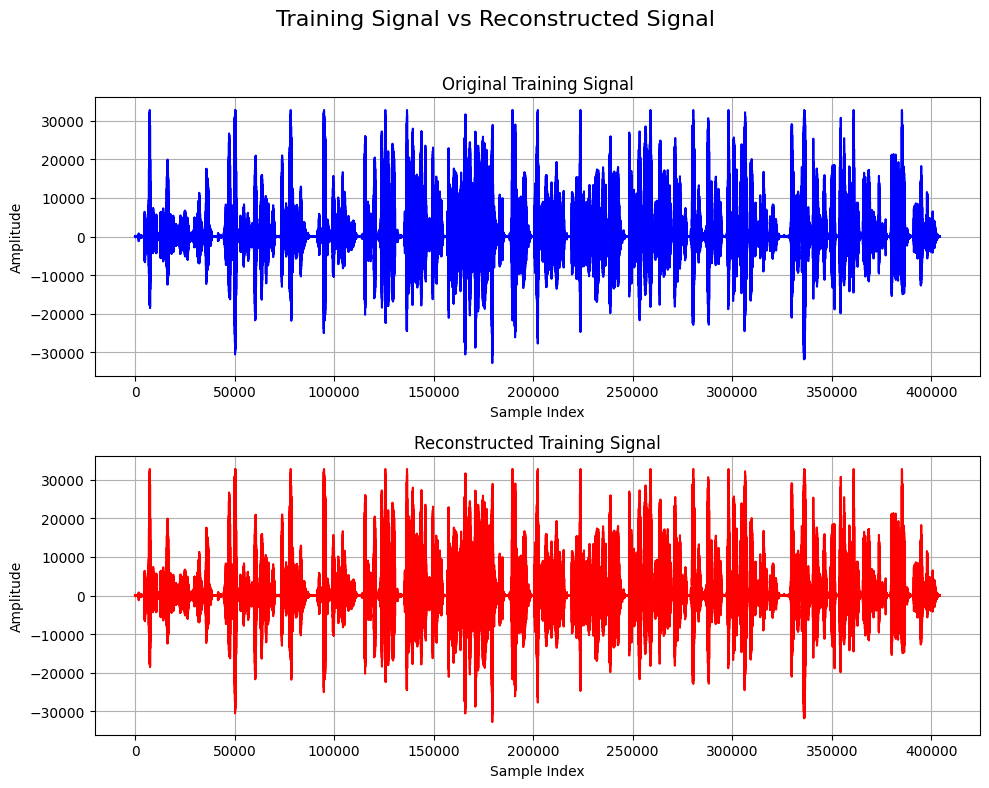

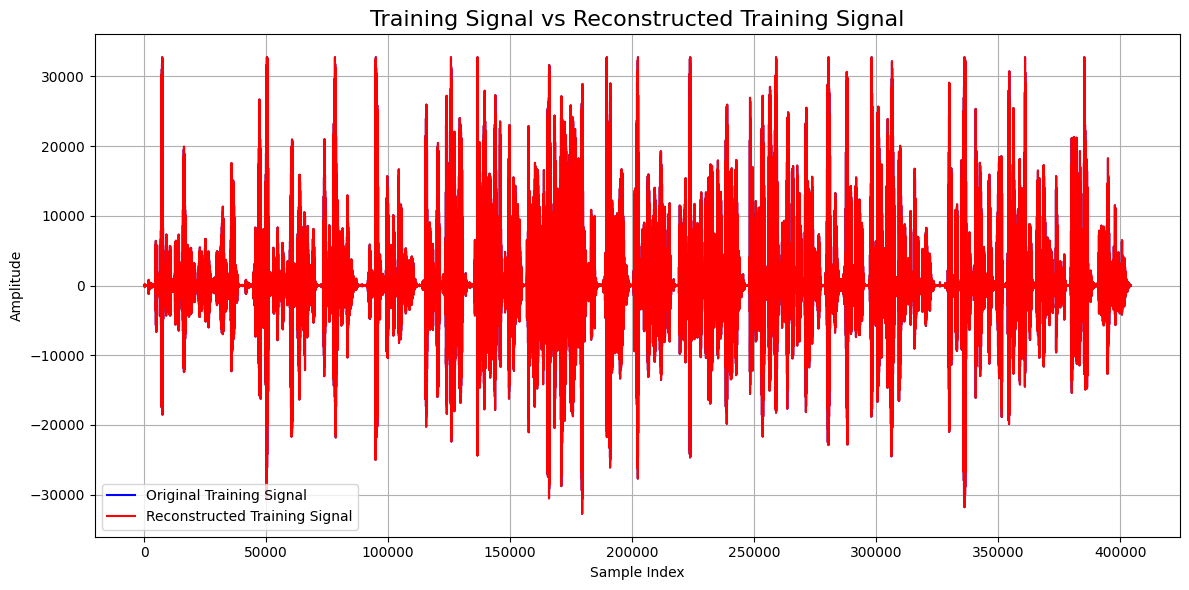

In [4]:
# Method 1: Huffman table with one timeframe as one symbol
# Using all data as the training and testing if the table works well

# create Huffman
freq_dict, size_huffman = get_unique(train_signal_array)    
huffman_root = create_huffman_tree(freq_dict)  
codes_dict = {}  
encoding_huffman(huffman_root, "", codes_dict)    

# encode, calculate encode time 
start_time_encoding = time.time()  
train_encoded_data = encode_with_nearest_symbol(train_signal_array, codes_dict)   
end_time_encoding = time.time()  
encoding_time_benchmark = end_time_encoding - start_time_encoding    

print(f'Encoding time benchmark: {encoding_time_benchmark:.6f} seconds')  
print(f"Huffman encoded data length benchmark: {len(train_encoded_data)} bits")    


# decode, calculate decode time
start_time_decoding = time.time()  
train_decoded_signal = decode_huffman(train_encoded_data, huffman_root)  
end_time_decoding = time.time()  
decoding_time_benchmark = end_time_decoding - start_time_decoding    

print(f'Decoding time benchmark: {decoding_time_benchmark:.6f} seconds')    

# calculate mse
mse_benchmark = calculate_mse(train_signal_array, train_decoded_signal, num_bit)  
print(f'MSE benchmark: {mse_benchmark}')    

# compresssion ratio and compression rate
compression_ratio_benchmark, compression_rate_benchmark = calculate_compression_Ratio(train_signal_array, num_bit, train_encoded_data)  
print(f'Compression ratio benchmark: {compression_ratio_benchmark}, Compression rate benchmark: {compression_rate_benchmark}')  
print(f'Size of Huffman Table: {size_huffman}') 

total_samples = sum(freq_dict.values()) 
entropy = calculate_entropy(train_signal_array)   
print(f"Entropy: {entropy:.4f} bits/symbol") 
avg_length = calculate_avg_code_length(freq_dict, codes_dict, total_samples) 
print(f"Average code length: {avg_length:.4f} bits/symbol")  

# Create figure and subplots 
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  

# Set figure title 
fig.suptitle('Training Signal vs Reconstructed Signal', fontsize=16)  

# Plot original training signal 
axs[0].plot(train_signal_array, 'b-') 
axs[0].set_title('Original Training Signal') 
axs[0].set_xlabel('Sample Index') 
axs[0].set_ylabel('Amplitude') 
axs[0].grid(True)  

# Plot reconstructed signal 
axs[1].plot(train_decoded_signal, 'r-') 
axs[1].set_title('Reconstructed Training Signal') 
axs[1].set_xlabel('Sample Index') 
axs[1].set_ylabel('Amplitude') 
axs[1].grid(True)  

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()   

# freq_dict
freq_dict, size_huffman_benchmark = get_unique(train_signal_array)  
huffman_root = create_huffman_tree(freq_dict) 
codes_dict = {} 
encoding_huffman(huffman_root, "", codes_dict)  
train_encoded_data = encode_with_nearest_symbol(train_signal_array, codes_dict)  
train_decoded_signal = decode_huffman(train_encoded_data, huffman_root)  

# plot the training and testing signal on the same plot to see if these two fully matches with each other. If so, the Huffman table works well. 
plt.figure(figsize=(12, 6))  
plt.plot(train_signal_array, 'b-', label='Original Training Signal')  
plt.plot(train_decoded_signal, 'r-', label='Reconstructed Training Signal')  

# Add title and labels 
plt.title('Training Signal vs Reconstructed Training Signal', fontsize=16) 
plt.xlabel('Sample Index') 
plt.ylabel('Amplitude') 
plt.grid(True) 
plt.legend()  

plt.tight_layout() 
plt.show()

In [5]:
# Method 2: pair-based method
# This is pair-based method

huffman_root, codes_dict, entropy, avg_length = train_pair_huffman(train_signal_array)
start_time = time.time()
encoded_data, compression_ratio, compression_rate = encode_signal_with_pairs(train_signal_array, codes_dict)
encoding_time = time.time() - start_time
print(f"Encoding Time: {encoding_time:.4f} s")

# Decoding
start_time = time.time()
decoded_signal = decode_pair_huffman(encoded_data, huffman_root, len(train_signal_array))
decoding_time = time.time() - start_time
print(f"Decoding time: {decoding_time:.4f} s")
is_perfect, decoded_train, compression_ratio, compression_rate, entropy, ave_length= test_train_signal_reconstruction(train_signal_array)

print(f"If the signal is perfectly reconstructed by the pair-based Huffman Encoding: {is_perfect}")
print(f"Compression Ratio: {compression_ratio:.2f}:1")
print(f"Compression Rate: {compression_rate:.2f}%")
print(f'Entropy: {entropy}')
print(f'ave length: {ave_length}')
print(f'size : {len(codes_dict)}')
# sd.play(decoded_train, 8000)


Encoding Time: 0.4630 s
Decoding time: 0.3718 s
Training Huffman model...
Encoding training signal...
Decoding training signal...
Checking reconstruction...

Compression metrics:
Entropy: 8.5679 bits/pair
Average code length: 17.2064 bits/pair
Compression ratio: 1.86:1
Compression rate: 46.23%
Training signal perfectly reconstructed
If the signal is perfectly reconstructed by the pair-based Huffman Encoding: True
Compression Ratio: 1.86:1
Compression Rate: 46.23%
Entropy: 8.567888145168459
ave length: 17.20636585353788
size : 173684


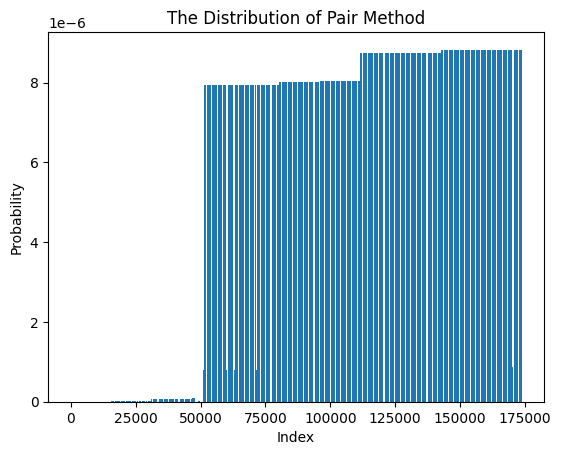

In [6]:
values = np.array(list(codes_dict.values()), dtype=float)
probabilities = values / values.sum()
plt.bar(range(len(probabilities)), probabilities)
plt.xlabel("Index")
plt.ylabel("Probability")
plt.title("The Distribution of Pair Method")
plt.show()

# 2. Task 2
Explore the results of different data selection

Uncovered symbols in test data: 4706 out of 20249
Uncovered symbol ratio: 0.2324 (23.24%)
Training data entropy: 12.3884 bits/symbol
Training data average code length: 12.4153 bits/symbol
Huffman encoded training data length: 2687623 bits
Training data compression ratio: 1.2887, Training data compression rate: 22.4045
6071 Unknown Symbols(Replaced Already)
Encoding time benchmark: 14.807283 seconds
Huffman encoded test data length: 2354452 bits
Decoding time benchmark: 0.161094 seconds
Total SE: 4.589985e+06
MSE benchmark: 24.440164
Test data compression ratio: 1.2763, Test data compression rate: 21.6457
Size of Huffman Table: 22232 bytes
Test data entropy: 12.3858 bits/symbol

--- Comparison between training and test data ---
Training entropy: 12.3884 bits/symbol | Test entropy: 12.3858 bits/symbol
Training avg code length: 12.4153 bits/symbol
Training compression ratio: 1.2887 | Test compression ratio: 1.2763
Training compression rate: 22.4045 | Test compression rate: 21.6457


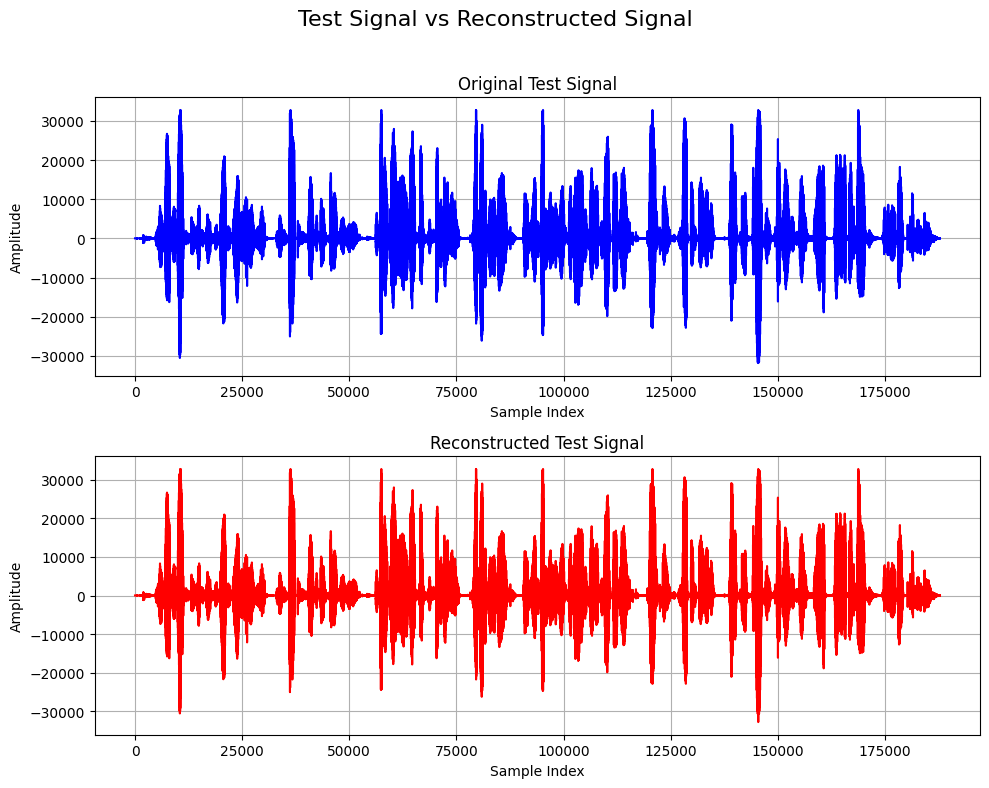

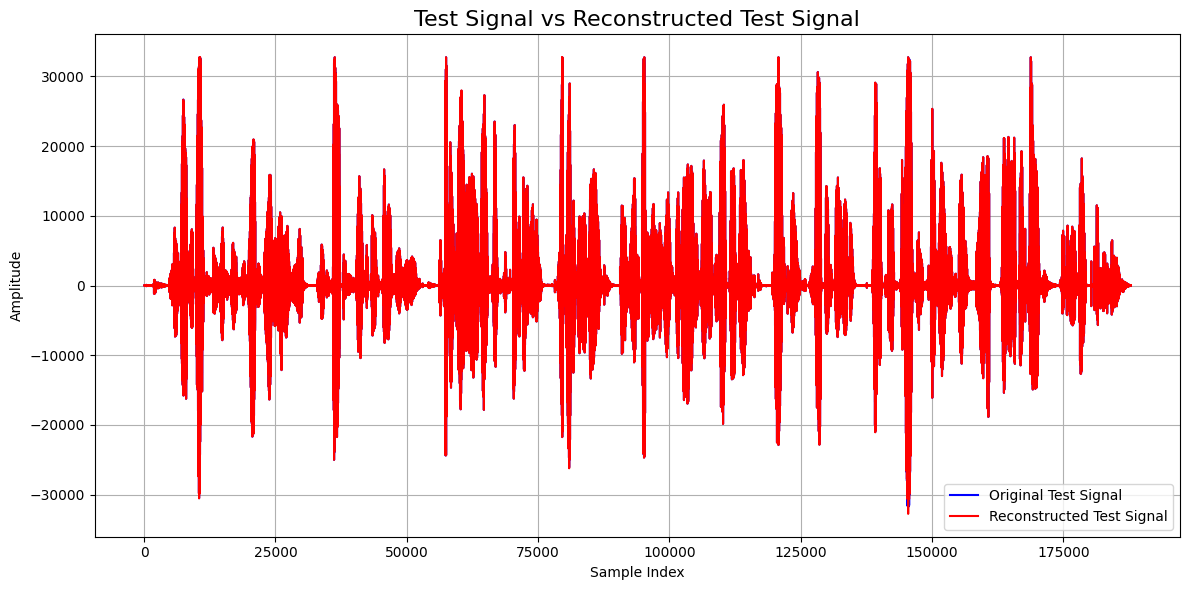

In [7]:
# Benchmark
# This is the benchmark selection: for each person, one file as the training data and the other one as the testing data
file_paths_train = []
file_paths_test = []

file_paths_train.append('files\F1\SI1573.wav\database\F1\SI1573.wav') 
file_paths_test.append('files\F1\SA1.wav\database\F1\SA1.wav') 
file_paths_train.append('files\F2\SX34.wav\database\F2\SX34.wav') 
file_paths_test.append('files\F2\SX304.wav\database\F2\SX304.wav') 
file_paths_train.append('files\F3\SI2114.wav\database\F3\SI2114.wav') 
file_paths_test.append('files\F3\SX134.wav\database\F3\SX134.wav') 
file_paths_train.append('files\F4\SI2204.wav\database\F4\SI2204.wav') 
file_paths_test.append('files\F4\SX224.wav\database\F4\SX224.wav') 
 
file_paths_train.append('files\M1\SA2.wav\database\M1\SA2.wav') 
file_paths_test.append('files\M1\SI2293.wav\database\M1\SI2293.wav') 
file_paths_train.append('files\M2\SI602.wav\database\M2\SI602.wav') 
file_paths_test.append('files\M2\SX374.wav\database\M2\SX374.wav') 
file_paths_train.append('files\M3\SX199.wav\database\M3\SX199.wav') 
file_paths_test.append('files\M3\SX289.wav\database\M3\SX289.wav') 
file_paths_train.append('files\M4\SI1019.wav\database\M4\SI1019.wav') 
file_paths_test.append('files\M4\SX389.wav\database\M4\SX389.wav') 

train_signals = []
test_signals = []
train_results_files = [] 
test_results_files = []
signal_arrays = [] 
 
for file_path in file_paths_train: 
    results, signal_array, _ = analyze_wav(file_path) 
    train_results_files.append(results) 
    train_signals.append(signal_array.flatten()) 

for file_path in file_paths_test: 
    results, signal_array, _ = analyze_wav(file_path) 
    test_results_files.append(results) 
    test_signals.append(signal_array.flatten()) 
    
num_bit = 16
train_signal_array = np.concatenate(train_signals)
test_signal_array = np.concatenate(test_signals)

freq_dict, size_huffman = get_unique(train_signal_array)    

huffman_root = create_huffman_tree(freq_dict)  
codes_dict = {}  
encoding_huffman(huffman_root, "", codes_dict)    

test_unique_symbols = np.unique(test_signal_array)
train_unique_symbols = np.array(list(codes_dict.keys()))

uncovered_symbols = np.setdiff1d(test_unique_symbols, train_unique_symbols)
uncovered_count = len(uncovered_symbols)
total_test_symbols = len(test_unique_symbols)
uncovered_ratio = uncovered_count / total_test_symbols

print(f"Uncovered symbols in test data: {uncovered_count} out of {total_test_symbols}")
print(f"Uncovered symbol ratio: {uncovered_ratio:.4f} ({uncovered_ratio*100:.2f}%)")

total_samples = sum(freq_dict.values())
train_entropy = calculate_entropy(train_signal_array)
train_avg_length = calculate_avg_code_length(freq_dict, codes_dict, total_samples)
print(f"Training data entropy: {train_entropy:.4f} bits/symbol")
print(f"Training data average code length: {train_avg_length:.4f} bits/symbol")

train_encoded_data = encode_with_nearest_symbol(train_signal_array, codes_dict)
print(f"Huffman encoded training data length: {len(train_encoded_data)} bits")

compression_ratio_train, compression_rate_train = calculate_compression_Ratio(train_signal_array, num_bit, train_encoded_data)
print(f'Training data compression ratio: {compression_ratio_train:.4f}, Training data compression rate: {compression_rate_train:.4f}')

start_time_encoding = time.time()  
test_encoded_data = encode_with_nearest_symbol(test_signal_array, codes_dict)  
end_time_encoding = time.time()  
encoding_time_benchmark = end_time_encoding - start_time_encoding    

print(f'Encoding time benchmark: {encoding_time_benchmark:.6f} seconds')  
print(f"Huffman encoded test data length: {len(test_encoded_data)} bits")    

start_time_decoding = time.time()  
test_decoded_signal = decode_huffman(test_encoded_data, huffman_root)  
end_time_decoding = time.time()  
decoding_time_benchmark = end_time_decoding - start_time_decoding    

print(f'Decoding time benchmark: {decoding_time_benchmark:.6f} seconds')    

total_se, mse = calculate_mse(test_signal_array, test_decoded_signal, num_bit)  
print(f'Total SE: {total_se:.6e}')
print(f'MSE benchmark: {mse:.6f}')    

compression_ratio_benchmark, compression_rate_benchmark = calculate_compression_Ratio(test_signal_array, num_bit, test_encoded_data)  
print(f'Test data compression ratio: {compression_ratio_benchmark:.4f}, Test data compression rate: {compression_rate_benchmark:.4f}')  
print(f'Size of Huffman Table: {size_huffman} bytes') 

test_entropy = calculate_entropy(test_signal_array)
print(f"Test data entropy: {test_entropy:.4f} bits/symbol")

# Compare the testing and training results
print("\n--- Comparison between training and test data ---")
print(f"Training entropy: {train_entropy:.4f} bits/symbol | Test entropy: {test_entropy:.4f} bits/symbol")
print(f"Training avg code length: {train_avg_length:.4f} bits/symbol")
print(f"Training compression ratio: {compression_ratio_train:.4f} | Test compression ratio: {compression_ratio_benchmark:.4f}")
print(f"Training compression rate: {compression_rate_train:.4f} | Test compression rate: {compression_rate_benchmark:.4f}")

# Create figure and subplots 
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  

# Set figure title 
fig.suptitle('Test Signal vs Reconstructed Signal', fontsize=16)  

# Plot original test signal 
axs[0].plot(test_signal_array, 'b-') 
axs[0].set_title('Original Test Signal') 
axs[0].set_xlabel('Sample Index') 
axs[0].set_ylabel('Amplitude') 
axs[0].grid(True)  

# Plot reconstructed signal 
axs[1].plot(test_decoded_signal, 'r-') 
axs[1].set_title('Reconstructed Test Signal') 
axs[1].set_xlabel('Sample Index') 
axs[1].set_ylabel('Amplitude') 
axs[1].grid(True)  

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()   
plt.figure(figsize=(12, 6))  
plt.plot(test_signal_array, 'b-', label='Original Test Signal')  
plt.plot(test_decoded_signal, 'r-', label='Reconstructed Test Signal')  
plt.title('Test Signal vs Reconstructed Test Signal', fontsize=16) 
plt.xlabel('Sample Index') 
plt.ylabel('Amplitude') 
plt.grid(True) 
plt.legend()  

plt.tight_layout() 
plt.show()

## 2.1 Speaker-based


Training with F1 + M1:
Uncovered symbols: 15711 out of 26251 (59.85%)
Training data metrics:
  Entropy: 11.9097 bits/symbol
  Average code length: 11.9375 bits/symbol
  Compression ratio: 1.3403
  Compression rate: 25.3904
39311 Unknown Symbols(Replaced Already)
Test data metrics:
  Entropy: 12.4862 bits/symbol
  Compression ratio: 1.2916
  Compression rate: 22.5780
  Normalized MSE: 8.540433e+02

Training with F1 + M1 + F2 + M2:
Uncovered symbols: 12070 out of 25402 (47.52%)
Training data metrics:
  Entropy: 12.0518 bits/symbol
  Average code length: 12.0817 bits/symbol
  Compression ratio: 1.3243
  Compression rate: 24.4896
22834 Unknown Symbols(Replaced Already)
Test data metrics:
  Entropy: 12.5166 bits/symbol
  Compression ratio: 1.2758
  Compression rate: 21.6166
  Normalized MSE: 8.987419e+02

Training with F1 + M1 + F2 + M2 + F3 + M3:
Uncovered symbols: 8612 out of 23693 (36.35%)
Training data metrics:
  Entropy: 12.1245 bits/symbol
  Average code length: 12.1542 bits/symbol
 

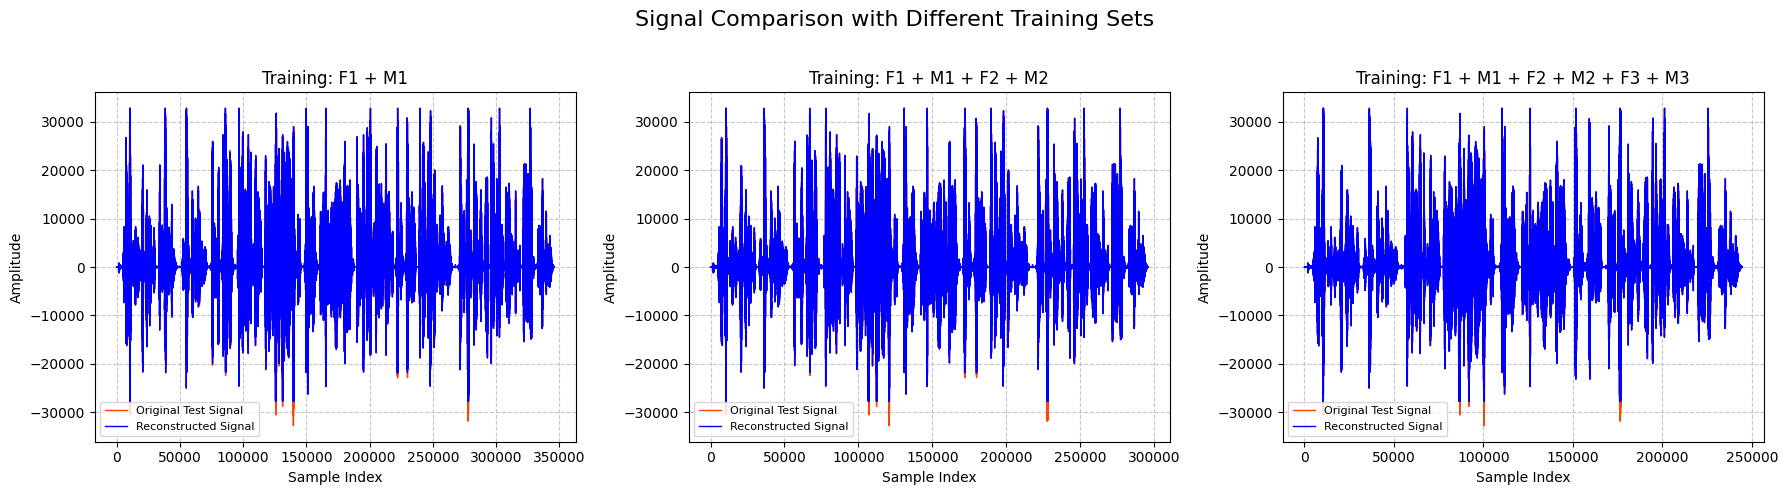


--- Training Data Metrics Comparison ---
# F+M Pairs Training Samples    Table LengthEntropy     Avg Length  Coding Eff. Comp. Ratio Comp. Rate  
------------------------------------------------------------------------------------------------------------------------
1           F1 + M1             11227       11.910      11.938      0.998       1.340       25.390      
2           F1 + M1 + F2 + M2   14868       12.052      12.082      0.998       1.324       24.490      
3           F1 + M1 + F2 + M2 + F3 + M318326       12.124      12.154      0.998       1.316       24.036      

--- Test Data Metrics Comparison ---
# F+M Pairs Training Samples    Table LengthComp. Ratio Comp. Rate  Total SE    Norm. MSE   Raw MSE     Uncov. RatioTest Entropy
--------------------------------------------------------------------------------------------------------------------------------------------
1           F1 + M1             11227       1.292       22.578      2.955e+08   8.540e+02   8.540e+02 

In [8]:
# Speaker based: 
all_files = {
    'F1': ['files\\F1\\SI1573.wav\\database\\F1\\SI1573.wav', 'files\\F1\\SA1.wav\\database\\F1\\SA1.wav'],
    'F2': ['files\\F2\\SX34.wav\\database\\F2\\SX34.wav', 'files\\F2\\SX304.wav\\database\\F2\\SX304.wav'],
    'F3': ['files\\F3\\SI2114.wav\\database\\F3\\SI2114.wav', 'files\\F3\\SX134.wav\\database\\F3\\SX134.wav'],
    'F4': ['files\\F4\\SI2204.wav\\database\\F4\\SI2204.wav', 'files\\F4\\SX224.wav\\database\\F4\\SX224.wav'],
    'M1': ['files\\M1\\SA2.wav\\database\\M1\\SA2.wav', 'files\\M1\\SI2293.wav\\database\\M1\\SI2293.wav'],
    'M2': ['files\\M2\\SI602.wav\\database\\M2\\SI602.wav', 'files\\M2\\SX374.wav\\database\\M2\\SX374.wav'],
    'M3': ['files\\M3\\SX199.wav\\database\\M3\\SX199.wav', 'files\\M3\\SX289.wav\\database\\M3\\SX289.wav'],
    'M4': ['files\\M4\\SI1019.wav\\database\\M4\\SI1019.wav', 'files\\M4\\SX389.wav\\database\\M4\\SX389.wav']
}

# Preload all signals
speaker_samples = {}
for speaker, file_paths in all_files.items():
    samples = []
    for idx, file_path in enumerate(file_paths):
        results, signal_array, _ = analyze_wav(file_path)
        if signal_array is not None:
            samples.append(signal_array.flatten())
    speaker_samples[speaker] = samples

# Define test configurations - gradually adding one sample from each F/M pair
test_configs = [
    {'train_samples': [('F1', 0), ('M1', 0)]},
    {'train_samples': [('F1', 0), ('M1', 0), ('F2', 0), ('M2', 0)]},
    {'train_samples': [('F1', 0), ('M1', 0), ('F2', 0), ('M2', 0), ('F3', 0), ('M3', 0)]}
]

# Store all test results
results = []
num_bit = 16

# Create a figure for all plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Run tests for each configuration
for config_idx, config in enumerate(test_configs):
    train_sample_specs = config['train_samples']
    
    # Gather training samples
    train_signals = []
    for speaker, sample_idx in train_sample_specs:
        train_signals.append(speaker_samples[speaker][sample_idx])
    
    train_signal_array = np.concatenate(train_signals)
    
    # Create a description of training samples used - moved up here
    train_desc = " + ".join([f"{speaker}" for speaker, _ in train_sample_specs])
    
    # Gather all samples not in training for testing
    test_signals = []
    for speaker, samples in speaker_samples.items():
        for idx, sample in enumerate(samples):
            # Skip if this specific sample is in the training set
            if (speaker, idx) not in train_sample_specs:
                test_signals.append(sample)
    
    test_signal_array = np.concatenate(test_signals)
    
    # Get frequency dictionary and Huffman table size
    freq_dict, size_huffman = get_unique(train_signal_array)
    
    # Create Huffman tree
    huffman_root = create_huffman_tree(freq_dict)
    codes_dict = {}
    encoding_huffman(huffman_root, "", codes_dict)
    
    # Calculate uncovered symbols ratio
    test_unique_symbols = np.unique(test_signal_array)
    train_unique_symbols = np.array(list(codes_dict.keys()))
    
    # Find symbols in test that are not in training
    uncovered_symbols = np.setdiff1d(test_unique_symbols, train_unique_symbols)
    uncovered_count = len(uncovered_symbols)
    total_test_symbols = len(test_unique_symbols)
    uncovered_ratio = uncovered_count / total_test_symbols
    
    print(f"\nTraining with {train_desc}:")
    print(f"Uncovered symbols: {uncovered_count} out of {total_test_symbols} ({uncovered_ratio*100:.2f}%)")
    
    # Calculate training data metrics
    total_samples = sum(freq_dict.values())
    train_entropy = calculate_entropy(train_signal_array)
    train_avg_length = calculate_avg_code_length(freq_dict, codes_dict, total_samples)
    
    # Encode training data and calculate compression metrics
    train_encoded_data = encode_with_nearest_symbol(train_signal_array, codes_dict)
    train_compression_ratio, train_compression_rate = calculate_compression_Ratio(train_signal_array, num_bit, train_encoded_data)
    
    print(f"Training data metrics:")
    print(f"  Entropy: {train_entropy:.4f} bits/symbol")
    print(f"  Average code length: {train_avg_length:.4f} bits/symbol")
    print(f"  Compression ratio: {train_compression_ratio:.4f}")
    print(f"  Compression rate: {train_compression_rate:.4f}")
    
    # Calculate test data entropy
    test_entropy = calculate_entropy(test_signal_array)
    
    # Encode and decode test data
    test_encoded_data = encode_with_nearest_symbol(test_signal_array, codes_dict)
    test_decoded_signal = decode_huffman(test_encoded_data, huffman_root)
    
    # Calculate test metrics
    total_se, raw_mse = calculate_mse(test_signal_array, test_decoded_signal, num_bit)
    
    # Calculate normalized MSE (Total SE divided by signal length)
    normalized_mse = total_se / len(test_signal_array)
    
    test_compression_ratio, test_compression_rate = calculate_compression_Ratio(test_signal_array, num_bit, test_encoded_data)
    
    print(f"Test data metrics:")
    print(f"  Entropy: {test_entropy:.4f} bits/symbol")
    print(f"  Compression ratio: {test_compression_ratio:.4f}")
    print(f"  Compression rate: {test_compression_rate:.4f}")
    print(f"  Normalized MSE: {normalized_mse:.6e}")
    
    # Save results
    config_result = {
        'num_speakers': len(train_sample_specs) // 2,  # Divide by 2 since each pair has M+F
        'train_desc': train_desc,
        'table_length': len(codes_dict),
        'size_huffman': size_huffman,
        'total_se': total_se,
        'normalized_mse': normalized_mse,
        'raw_mse': raw_mse,
        'train_entropy': train_entropy,
        'train_avg_length': train_avg_length,
        'train_compression_ratio': train_compression_ratio,
        'train_compression_rate': train_compression_rate,
        'test_entropy': test_entropy,
        'test_compression_ratio': test_compression_ratio,
        'test_compression_rate': test_compression_rate,
        'entropy': train_entropy,  # Keeping original key for backward compatibility
        'avg_length': train_avg_length,  # Keeping original key for backward compatibility
        'uncovered_ratio': uncovered_ratio,
        'test_signal_array': test_signal_array,
        'test_decoded_signal': test_decoded_signal
    }
    results.append(config_result)
    
    # Plot test signal and reconstructed signal on each subplot
    ax = axs[config_idx]
    
    # Plot both signals on the same graph - using full length
    ax.plot(test_signal_array, linewidth=1, color='orangered', label='Original Test Signal')
    ax.plot(test_decoded_signal, linewidth=1, color='blue', label='Reconstructed Signal')
    
    ax.set_xlabel('Sample Index', fontsize=10)
    ax.set_ylabel('Amplitude', fontsize=10)
    ax.set_title(f'Training: {train_desc}', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=8)

# Set a main title for the entire figure
fig.suptitle('Signal Comparison with Different Training Sets', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Create metrics comparison table
print("\n--- Training Data Metrics Comparison ---")
print(f"{'# F+M Pairs':<12}{'Training Samples':<20}{'Table Length':<12}{'Entropy':<12}{'Avg Length':<12}{'Coding Eff.':<12}{'Comp. Ratio':<12}{'Comp. Rate':<12}")
print("-" * 120)

for result in results:
    num_pairs = result['num_speakers']
    coding_efficiency = result['train_entropy'] / result['train_avg_length']
    print(f"{num_pairs:<12}{result['train_desc']:<20}{result['table_length']:<12}{result['train_entropy']:<12.3f}{result['train_avg_length']:<12.3f}{coding_efficiency:<12.3f}{result['train_compression_ratio']:<12.3f}{result['train_compression_rate']:<12.3f}")

print("\n--- Test Data Metrics Comparison ---")
print(f"{'# F+M Pairs':<12}{'Training Samples':<20}{'Table Length':<12}{'Comp. Ratio':<12}{'Comp. Rate':<12}{'Total SE':<12}{'Norm. MSE':<12}{'Raw MSE':<12}{'Uncov. Ratio':<12}{'Test Entropy':<12}")
print("-" * 140)

for result in results:
    num_pairs = result['num_speakers']
    print(f"{num_pairs:<12}{result['train_desc']:<20}{result['table_length']:<12}{result['test_compression_ratio']:<12.3f}{result['test_compression_rate']:<12.3f}{result['total_se']:<12.3e}{result['normalized_mse']:<12.3e}{result['raw_mse']:<12.3e}{result['uncovered_ratio']*100:<12.3f}%{result['test_entropy']:<12.3f}")

## 2.2 Gender-based 


Here, one gender is used as the training data and the other is the testing data. First using the female as the training set and then conversely using the male. 


Training with All Female Speakers (F1 + F2 + F3 + F4):
Uncovered symbols: 4058 out of 19607 (20.70%)
Training data metrics:
  Entropy: 12.4480 bits/symbol
  Average code length: 12.4765 bits/symbol
  Compression ratio: 1.2824
  Compression rate: 22.0220
5405 Unknown Symbols(Replaced Already)
Test data metrics:
  Entropy: 12.3230 bits/symbol
  Compression ratio: 1.2812
  Compression rate: 21.9458
  Normalized MSE: 2.006521e+01


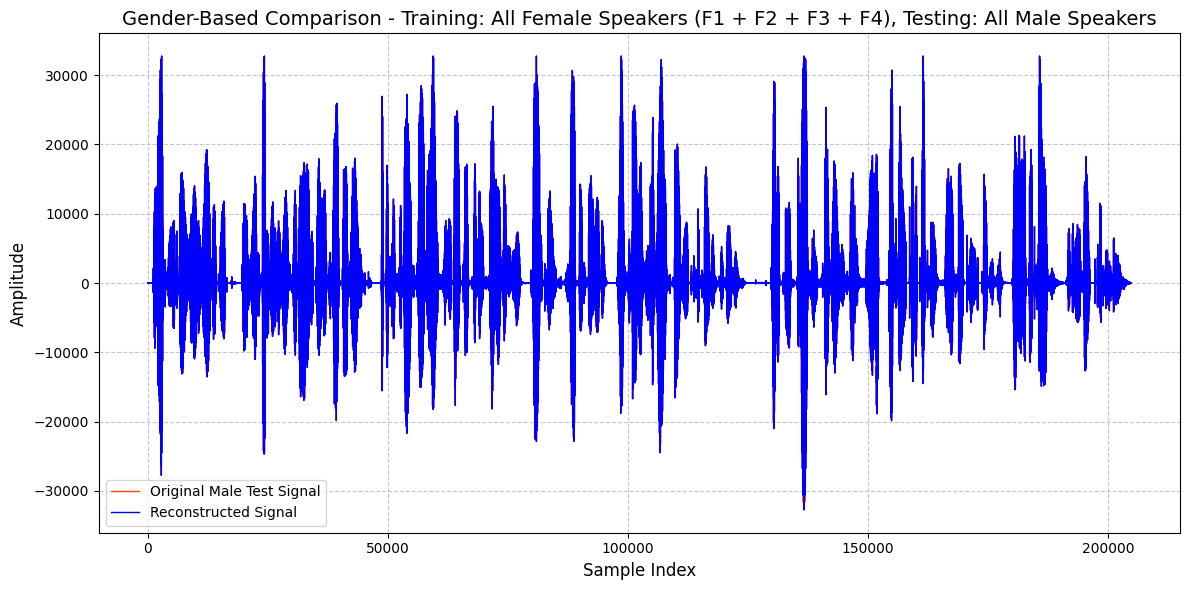

All Female Speakers (F1 + F2 + F3 + F4)22880          12.448         12.476         1.282          

--- Test Metrics (Male Samples) ---
Training Set             Table LengthEntropy     Avg Length  Test Comp. RatioTest Comp. RateTotal SE       Norm. MSE      Uncov. Ratio   Test Entropy   
------------------------------------------------------------------------------------------------------------------------------------------------------
All Female Speakers (F1 + F2 + F3 + F4)22880       12.448      12.476      1.281          21.946         4.108e+06      2.007e+01      20.697         %12.323         


In [9]:
# Using Female as the training
# Define all file paths, organized by speaker and sample
all_files = {
    'F1': ['files\\F1\\SI1573.wav\\database\\F1\\SI1573.wav', 'files\\F1\\SA1.wav\\database\\F1\\SA1.wav'],
    'F2': ['files\\F2\\SX34.wav\\database\\F2\\SX34.wav', 'files\\F2\\SX304.wav\\database\\F2\\SX304.wav'],
    'F3': ['files\\F3\\SI2114.wav\\database\\F3\\SI2114.wav', 'files\\F3\\SX134.wav\\database\\F3\\SX134.wav'],
    'F4': ['files\\F4\\SI2204.wav\\database\\F4\\SI2204.wav', 'files\\F4\\SX224.wav\\database\\F4\\SX224.wav'],
    'M1': ['files\\M1\\SA2.wav\\database\\M1\\SA2.wav', 'files\\M1\\SI2293.wav\\database\\M1\\SI2293.wav'],
    'M2': ['files\\M2\\SI602.wav\\database\\M2\\SI602.wav', 'files\\M2\\SX374.wav\\database\\M2\\SX374.wav'],
    'M3': ['files\\M3\\SX199.wav\\database\\M3\\SX199.wav', 'files\\M3\\SX289.wav\\database\\M3\\SX289.wav'],
    'M4': ['files\\M4\\SI1019.wav\\database\\M4\\SI1019.wav', 'files\\M4\\SX389.wav\\database\\M4\\SX389.wav']
}

# Preload all signals
speaker_samples = {}
for speaker, file_paths in all_files.items():
    samples = []
    for idx, file_path in enumerate(file_paths):
        results, signal_array, _ = analyze_wav(file_path)
        if signal_array is not None:
            samples.append(signal_array.flatten())
    speaker_samples[speaker] = samples

# Define female speakers for training and male speakers for testing
female_speakers = ['F1', 'F2', 'F3', 'F4']
male_speakers = ['M1', 'M2', 'M3', 'M4']

# Store all test results
results = []
num_bit = 16

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Gather all female samples for training
train_signals = []
for speaker in female_speakers:
    for sample in speaker_samples[speaker]:
        train_signals.append(sample)

train_signal_array = np.concatenate(train_signals)

# Gather all male samples for testing
test_signals = []
for speaker in male_speakers:
    for sample in speaker_samples[speaker]:
        test_signals.append(sample)

test_signal_array = np.concatenate(test_signals)

# Create a description of training samples used
train_desc = "All Female Speakers (F1 + F2 + F3 + F4)"

# Get frequency dictionary and Huffman table size
freq_dict, size_huffman = get_unique(train_signal_array)

# Create Huffman tree
huffman_root = create_huffman_tree(freq_dict)
codes_dict = {}
encoding_huffman(huffman_root, "", codes_dict)

# Calculate uncovered symbols ratio
test_unique_symbols = np.unique(test_signal_array)
train_unique_symbols = np.array(list(codes_dict.keys()))

# Find symbols in test that are not in training
uncovered_symbols = np.setdiff1d(test_unique_symbols, train_unique_symbols)
uncovered_count = len(uncovered_symbols)
total_test_symbols = len(test_unique_symbols)
uncovered_ratio = uncovered_count / total_test_symbols

print(f"\nTraining with {train_desc}:")
print(f"Uncovered symbols: {uncovered_count} out of {total_test_symbols} ({uncovered_ratio*100:.2f}%)")

# Calculate training data metrics
total_samples = sum(freq_dict.values())
train_entropy = calculate_entropy(train_signal_array)
train_avg_length = calculate_avg_code_length(freq_dict, codes_dict, total_samples)

# Encode training data and calculate compression metrics
train_encoded_data = encode_with_nearest_symbol(train_signal_array, codes_dict)
train_compression_ratio, train_compression_rate = calculate_compression_Ratio(train_signal_array, num_bit, train_encoded_data)

print(f"Training data metrics:")
print(f"  Entropy: {train_entropy:.4f} bits/symbol")
print(f"  Average code length: {train_avg_length:.4f} bits/symbol")
print(f"  Compression ratio: {train_compression_ratio:.4f}")
print(f"  Compression rate: {train_compression_rate:.4f}")

# Calculate test data entropy
test_entropy = calculate_entropy(test_signal_array)

# Encode and decode test data
test_encoded_data = encode_with_nearest_symbol(test_signal_array, codes_dict)
test_decoded_signal = decode_huffman(test_encoded_data, huffman_root)

# Calculate test metrics
total_se, raw_mse = calculate_mse(test_signal_array, test_decoded_signal, num_bit)

# Calculate normalized MSE (Total SE divided by signal length)
normalized_mse = total_se / len(test_signal_array)

test_compression_ratio, test_compression_rate = calculate_compression_Ratio(test_signal_array, num_bit, test_encoded_data)

print(f"Test data metrics:")
print(f"  Entropy: {test_entropy:.4f} bits/symbol")
print(f"  Compression ratio: {test_compression_ratio:.4f}")
print(f"  Compression rate: {test_compression_rate:.4f}")
print(f"  Normalized MSE: {normalized_mse:.6e}")

# Save results
config_result = {
    'train_desc': train_desc,
    'table_length': len(codes_dict),
    'size_huffman': size_huffman,
    'total_se': total_se,
    'normalized_mse': normalized_mse,
    'train_entropy': train_entropy,
    'train_avg_length': train_avg_length,
    'train_compression_ratio': train_compression_ratio,
    'train_compression_rate': train_compression_rate,
    'test_entropy': test_entropy,
    'test_compression_ratio': test_compression_ratio,
    'test_compression_rate': test_compression_rate,
    'entropy': train_entropy,  # Keeping original key for backward compatibility
    'avg_length': train_avg_length,  # Keeping original key for backward compatibility
    'uncovered_ratio': uncovered_ratio,
    'test_signal_array': test_signal_array,
    'test_decoded_signal': test_decoded_signal
}
results.append(config_result)

# Plot test signal and reconstructed signal
# Plot both signals on the same graph - show full signal without truncation
ax.plot(test_signal_array, 
        linewidth=1, color='orangered', label='Original Male Test Signal')
ax.plot(test_decoded_signal, 
        linewidth=1, color='blue', label='Reconstructed Signal')

ax.set_xlabel('Sample Index', fontsize=12)
ax.set_ylabel('Amplitude', fontsize=12)
ax.set_title(f'Gender-Based Comparison - Training: {train_desc}, Testing: All Male Speakers', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Create metrics table

print(f"{results[0]['train_desc']:<25}{results[0]['table_length']:<15}{results[0]['train_entropy']:<15.3f}{results[0]['train_avg_length']:<15.3f}{results[0]['train_compression_ratio']:<15.3f}")

print("\n--- Test Metrics (Male Samples) ---")
print(f"{'Training Set':<25}{'Table Length':<12}{'Entropy':<12}{'Avg Length':<12}{'Test Comp. Ratio':<15}{'Test Comp. Rate':<15}{'Total SE':<15}{'Norm. MSE':<15}{'Uncov. Ratio':<15}{'Test Entropy':<15}")
print("-" * 150)

print(f"{results[0]['train_desc']:<25}{results[0]['table_length']:<12}{results[0]['train_entropy']:<12.3f}{results[0]['train_avg_length']:<12.3f}{results[0]['test_compression_ratio']:<15.3f}{results[0]['test_compression_rate']:<15.3f}{results[0]['total_se']:<15.3e}{results[0]['normalized_mse']:<15.3e}{results[0]['uncovered_ratio']*100:<15.3f}%{results[0]['test_entropy']:<15.3f}")



Training with All Male Speakers (M1 + M2 + M3 + M4):
Uncovered symbols: 7331 out of 22880 (32.04%)
Training data metrics:
  Entropy: 12.3230 bits/symbol
  Average code length: 12.3510 bits/symbol
  Compression ratio: 1.2954
  Compression rate: 22.8062
10508 Unknown Symbols(Replaced Already)
Test data metrics:
  Entropy: 12.4480 bits/symbol
  Compression ratio: 1.2725
  Compression rate: 21.4160
  Normalized MSE: 2.190515e+01


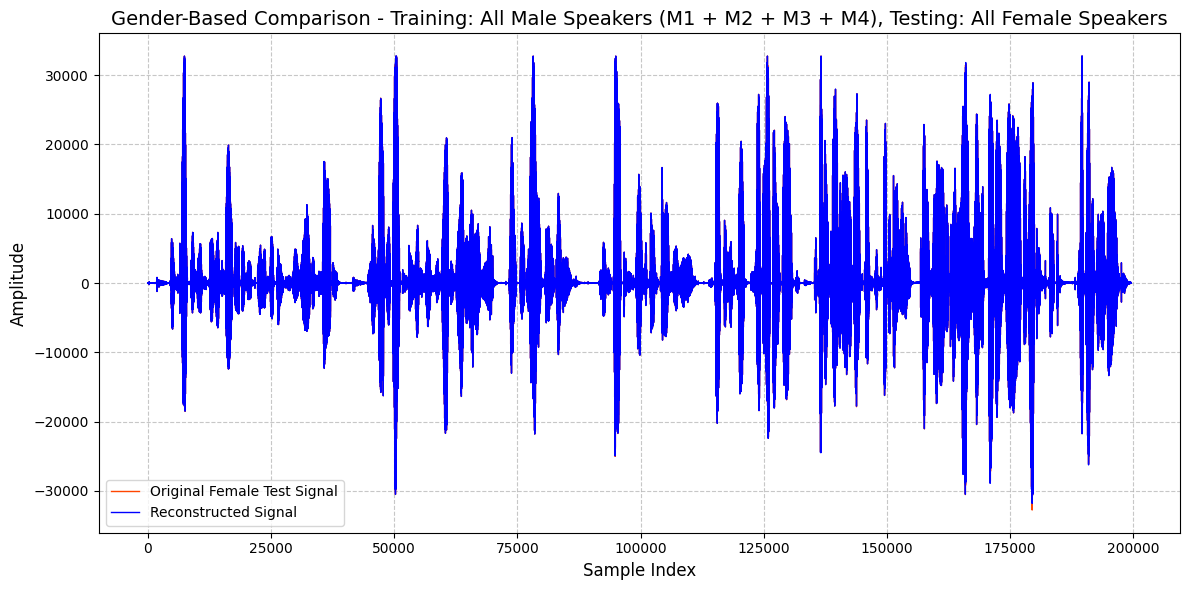


--- Gender-Based Analysis (Male Training, Female Testing) ---
Training Set             Table Length   Train Entropy  Train Avg Len  Coding Eff.    Train Comp. Ratio
----------------------------------------------------------------------------------------------------
All Male Speakers (M1 + M2 + M3 + M4)19607          12.323         12.351         1.295          

--- Test Metrics (Female Samples) ---
Training Set             Table LengthEntropy     Avg Length  Test Comp. RatioTest Comp. RateTotal SE       Norm. MSE      Uncov. Ratio   Test Entropy   
------------------------------------------------------------------------------------------------------------------------------------------------------
All Male Speakers (M1 + M2 + M3 + M4)19607       12.323      12.351      1.273          21.416         4.371e+06      2.191e+01      32.041         %12.448         


In [10]:
# Male Training
# Define all file paths, organized by speaker and sample
all_files = {
    'F1': ['files\\F1\\SI1573.wav\\database\\F1\\SI1573.wav', 'files\\F1\\SA1.wav\\database\\F1\\SA1.wav'],
    'F2': ['files\\F2\\SX34.wav\\database\\F2\\SX34.wav', 'files\\F2\\SX304.wav\\database\\F2\\SX304.wav'],
    'F3': ['files\\F3\\SI2114.wav\\database\\F3\\SI2114.wav', 'files\\F3\\SX134.wav\\database\\F3\\SX134.wav'],
    'F4': ['files\\F4\\SI2204.wav\\database\\F4\\SI2204.wav', 'files\\F4\\SX224.wav\\database\\F4\\SX224.wav'],
    'M1': ['files\\M1\\SA2.wav\\database\\M1\\SA2.wav', 'files\\M1\\SI2293.wav\\database\\M1\\SI2293.wav'],
    'M2': ['files\\M2\\SI602.wav\\database\\M2\\SI602.wav', 'files\\M2\\SX374.wav\\database\\M2\\SX374.wav'],
    'M3': ['files\\M3\\SX199.wav\\database\\M3\\SX199.wav', 'files\\M3\\SX289.wav\\database\\M3\\SX289.wav'],
    'M4': ['files\\M4\\SI1019.wav\\database\\M4\\SI1019.wav', 'files\\M4\\SX389.wav\\database\\M4\\SX389.wav']
}

# Preload all signals
speaker_samples = {}
for speaker, file_paths in all_files.items():
    samples = []
    for idx, file_path in enumerate(file_paths):
        results, signal_array, _ = analyze_wav(file_path)
        if signal_array is not None:
            samples.append(signal_array.flatten())
    speaker_samples[speaker] = samples

# Define male speakers for training and female speakers for testing (reversed from previous code)
male_speakers = ['M1', 'M2', 'M3', 'M4']
female_speakers = ['F1', 'F2', 'F3', 'F4']

# Store all test results
results = []
num_bit = 16

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Gather all male samples for training
train_signals = []
for speaker in male_speakers:
    for sample in speaker_samples[speaker]:
        train_signals.append(sample)

train_signal_array = np.concatenate(train_signals)

# Gather all female samples for testing
test_signals = []
for speaker in female_speakers:
    for sample in speaker_samples[speaker]:
        test_signals.append(sample)

test_signal_array = np.concatenate(test_signals)

# Create a description of training samples used
train_desc = "All Male Speakers (M1 + M2 + M3 + M4)"

# Get frequency dictionary and Huffman table size
freq_dict, size_huffman = get_unique(train_signal_array)

# Create Huffman tree
huffman_root = create_huffman_tree(freq_dict)
codes_dict = {}
encoding_huffman(huffman_root, "", codes_dict)

# Calculate uncovered symbols ratio
test_unique_symbols = np.unique(test_signal_array)
train_unique_symbols = np.array(list(codes_dict.keys()))

# Find symbols in test that are not in training
uncovered_symbols = np.setdiff1d(test_unique_symbols, train_unique_symbols)
uncovered_count = len(uncovered_symbols)
total_test_symbols = len(test_unique_symbols)
uncovered_ratio = uncovered_count / total_test_symbols

print(f"\nTraining with {train_desc}:")
print(f"Uncovered symbols: {uncovered_count} out of {total_test_symbols} ({uncovered_ratio*100:.2f}%)")

# Calculate training data metrics
total_samples = sum(freq_dict.values())
train_entropy = calculate_entropy(train_signal_array)
train_avg_length = calculate_avg_code_length(freq_dict, codes_dict, total_samples)

# Encode training data and calculate compression metrics
train_encoded_data = encode_with_nearest_symbol(train_signal_array, codes_dict)
train_compression_ratio, train_compression_rate = calculate_compression_Ratio(train_signal_array, num_bit, train_encoded_data)

print(f"Training data metrics:")
print(f"  Entropy: {train_entropy:.4f} bits/symbol")
print(f"  Average code length: {train_avg_length:.4f} bits/symbol")
print(f"  Compression ratio: {train_compression_ratio:.4f}")
print(f"  Compression rate: {train_compression_rate:.4f}")

# Calculate test data entropy
test_entropy = calculate_entropy(test_signal_array)

# Encode and decode test data
test_encoded_data = encode_with_nearest_symbol(test_signal_array, codes_dict)
test_decoded_signal = decode_huffman(test_encoded_data, huffman_root)

# Calculate test metrics
total_se, raw_mse = calculate_mse(test_signal_array, test_decoded_signal, num_bit)

# Calculate normalized MSE (Total SE divided by signal length)
normalized_mse = total_se / len(test_signal_array)

test_compression_ratio, test_compression_rate = calculate_compression_Ratio(test_signal_array, num_bit, test_encoded_data)

print(f"Test data metrics:")
print(f"  Entropy: {test_entropy:.4f} bits/symbol")
print(f"  Compression ratio: {test_compression_ratio:.4f}")
print(f"  Compression rate: {test_compression_rate:.4f}")
print(f"  Normalized MSE: {normalized_mse:.6e}")

# Save results
config_result = {
    'train_desc': train_desc,
    'table_length': len(codes_dict),
    'size_huffman': size_huffman,
    'total_se': total_se,
    'normalized_mse': normalized_mse,
    'raw_mse': raw_mse,
    'train_entropy': train_entropy,
    'train_avg_length': train_avg_length,
    'train_compression_ratio': train_compression_ratio,
    'train_compression_rate': train_compression_rate,
    'test_entropy': test_entropy,
    'test_compression_ratio': test_compression_ratio,
    'test_compression_rate': test_compression_rate,
    'entropy': train_entropy,  # Keeping original key for backward compatibility
    'avg_length': train_avg_length,  # Keeping original key for backward compatibility
    'uncovered_ratio': uncovered_ratio,
    'test_signal_array': test_signal_array,
    'test_decoded_signal': test_decoded_signal
}
results.append(config_result)

ax.plot(test_signal_array, 
        linewidth=1, color='orangered', label='Original Female Test Signal')
ax.plot(test_decoded_signal, 
        linewidth=1, color='blue', label='Reconstructed Signal')

ax.set_xlabel('Sample Index', fontsize=12)
ax.set_ylabel('Amplitude', fontsize=12)
ax.set_title(f'Gender-Based Comparison - Training: {train_desc}, Testing: All Female Speakers', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Create metrics table
print("\n--- Gender-Based Analysis (Male Training, Female Testing) ---")
print(f"{'Training Set':<25}{'Table Length':<15}{'Train Entropy':<15}{'Train Avg Len':<15}{'Coding Eff.':<15}{'Train Comp. Ratio':<15}")
print("-" * 100)


print(f"{results[0]['train_desc']:<25}{results[0]['table_length']:<15}{results[0]['train_entropy']:<15.3f}{results[0]['train_avg_length']:<15.3f}{results[0]['train_compression_ratio']:<15.3f}")

print("\n--- Test Metrics (Female Samples) ---")
print(f"{'Training Set':<25}{'Table Length':<12}{'Entropy':<12}{'Avg Length':<12}{'Test Comp. Ratio':<15}{'Test Comp. Rate':<15}{'Total SE':<15}{'Norm. MSE':<15}{'Uncov. Ratio':<15}{'Test Entropy':<15}")
print("-" * 150)

print(f"{results[0]['train_desc']:<25}{results[0]['table_length']:<12}{results[0]['train_entropy']:<12.3f}{results[0]['train_avg_length']:<12.3f}{results[0]['test_compression_ratio']:<15.3f}{results[0]['test_compression_rate']:<15.3f}{results[0]['total_se']:<15.3e}{results[0]['normalized_mse']:<15.3e}{results[0]['uncovered_ratio']*100:<15.3f}%{results[0]['test_entropy']:<15.3f}")
